# Exploring the Indian Startup Ecosystem: Data Analysis and Strategic Insights

In this project, our team dives into the world of Indian startups. Using data analysis, we will explore funding trends, regional disparities, and investor behavior and preferences. We aim to find what is working, what is not, and where the opportunities lie. The insights we gain will help guide our strategy as we venture into the Indian startup ecosystem, making informed decisions in this dynamic market.


#NULL HYPOTHESIS: There has been no significant increase in the amounts of funding received by Indian startups between 2018 and 2021


#ALTERNATIVE HYPOTHESIS: The amounts of funding received by Indian startups have increased significantly between 2018 to 2021.

 

Analytical Questions:
1. What top 10 sectors have received the highest amount of funding
2. What top 10 sectors have received lowest amounts of funding
3. What is the average amount of funding a startup received 
3. Which funding stages tend to receive the highest amount of funding
4. Which Regions(Location of headquarters) in India have the highest concentration of successfully funded startups
6. What is the overall trend in funding for Indian startups over the past years



In [582]:
%pip install pyodbc


Note: you may need to restart the kernel to use updated packages.


In [583]:
%pip install python-dotenv


Note: you may need to restart the kernel to use updated packages.


In [584]:
#import necesssary modules
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [585]:
# Load environment variables from .env file into a dictionary
environment_variables=dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

#code for connection 
connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [586]:
# Use the connect method of the pyodbc library and pass in the connection string

connection = pyodbc.connect(connection_string)

# Getting the data

In [587]:
#write query statement to get dateset

query = "Select * from dbo.LP1_startup_funding2020"
data = pd.read_sql(query, connection)
 
data.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,None
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,None
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,None
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,None


In [588]:
#get data shape
data.shape


(1055, 10)

In [589]:
#get data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [590]:
#load second dataset

query2 = "Select * from dbo.LP1_startup_funding2021"
data1 = pd.read_sql(query2, connection)
 
data1.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [591]:
data1.shape

(1209, 9)

In [592]:
#load  third dataset
data2 = pd.read_csv('startup_funding2019.csv')
data2.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [593]:
#load fourth dataset

data3 = pd.read_csv('startup_funding2018.csv')
data3.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


# Data Cleaning and EDA


Duplicates are dropped to ensure the uniqueness of the data

In [ ]:
#drop duplicates in first dataset if any

data = data.drop_duplicates()
data.head()

Unecessary columns are dropped to improve data quality by ensuring that only relevant data is used

In [595]:
#drop unnecesary columns ('column10)

data = data.drop(columns='column10')
data.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None


A new column which shows the year the funding was received is added in order to enable time series analysis when the data sets are concatenated into one 

In [596]:
#create a new column called Year Funded and fill with 2020

value_to_fill = 2020
data['Year Funded'] = value_to_fill
data

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,2020
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000,None,2020
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000,Seed Round,2020
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000,None,2020
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000,Series C,2020


In [597]:
#Get data shape to know number of rows and columns

data1.shape

(1209, 9)

In [598]:
#drop duplicates if any for the second dataset to ensure uniqueness of dataset

data1 = data1.drop_duplicates()
data1

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [599]:
#create a new column called Year Funded and fill with 2021

value_to_fill1 = 2021
data1['Year Funded'] = value_to_fill1
data1

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A,2021
1205,Vahdam,2015,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D,2021
1206,Leap Finance,2019,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C,2021
1207,CollegeDekho,2015,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B,2021


similar datasets are concatenated to make analysis easy and effective

In [601]:
#concat first and second dataset 

df = pd.concat([data, data1])
df

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,2020
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,NaN,Pre-series A,2021
1205,Vahdam,2015,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,NaN,Series D,2021
1206,Leap Finance,2019,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,NaN,Series C,2021
1207,CollegeDekho,2015,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",NaN,Series B,2021


In [602]:
# get data info to be sure of what we are working with

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2242 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2242 non-null   object 
 1   Founded        2028 non-null   float64
 2   HeadQuarter    2147 non-null   object 
 3   Sector         2229 non-null   object 
 4   What_it_does   2242 non-null   object 
 5   Founders       2226 non-null   object 
 6   Investor       2143 non-null   object 
 7   Amount         1583 non-null   float64
 8   Stage          1359 non-null   object 
 9   Year Funded    2242 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 192.7+ KB


In [603]:
df.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,2020


In [604]:
pd.set_option('display.max_rows', 10)

Amount column is converted to a numeric value to enable aggregations. Errors are coerced to NaN to prevent code errors

In [605]:
# Convert 'Amount' column to numeric, coercing errors to NaN

df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

In [606]:
#get data head to preview the dataframe

df.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,2020


In [607]:
# Set the display options to show float values without scientific notation. This removes the decimal notation from the year values

pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [608]:
# Rename the column from 'Amount' to 'Amount($)'

df.rename(columns={'Amount': 'Amount($)'}, inplace=True)

In [609]:
df.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Year Funded
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,2020


In [610]:
# Rename the column from 'What_it_does' to 'What it does'

df.rename(columns={'What_it_does': 'What it does'}, inplace=True)

In [611]:
# Rename the column from 'Company_Brand' to 'Company Brand'

df.rename(columns={'Company_Brand': 'Company Brand'}, inplace=True)

In [613]:
df.head()

,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year Funded
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,2020


In [614]:
#get a view of the third dataset

data2.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [615]:
#create a new column called Year Funded and fill with 2019

value_to_fill2 = 2019
data2['Year Funded'] = value_to_fill2
data2

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year Funded
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019
...,...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A,2019
85,Oyo,2013,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN,2019
86,GoMechanic,2016,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B,2019
87,Spinny,2015,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN,2019


In [616]:
# Remove currency symbols from data2 to enable aggregations
data2['Amount($)'] = data2['Amount($)'].str.replace('$', '')
data2

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year Funded
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"6,300,000",NaN,2019
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","28,000,000",Fresh funding,2019
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","30,000,000",Series D,2019
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"6,000,000",NaN,2019
...,...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","20,000,000",Series A,2019
85,Oyo,2013,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","693,000,000",NaN,2019
86,GoMechanic,2016,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"5,000,000",Series B,2019
87,Spinny,2015,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","50,000,000",NaN,2019


In [617]:
# Rename the column from 'Company/Brand' to 'Company Brand'

data2.rename(columns={'Company/Brand': 'Company Brand'}, inplace=True)

In [618]:
data2.head()

,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year Funded
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"6,300,000",NaN,2019
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","28,000,000",Fresh funding,2019
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","30,000,000",Series D,2019
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"6,000,000",NaN,2019


In [619]:
#Concatenate df with third dataset

df1 = pd.concat([df, data2])
df1


,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year Funded
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,2020
...,...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","20,000,000",Series A,2019
85,Oyo,2013,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","693,000,000",NaN,2019
86,GoMechanic,2016,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"5,000,000",Series B,2019
87,Spinny,2015,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","50,000,000",NaN,2019


We check for the number of null values to know what we are dealing with

In [620]:
#Check for number of null values

df1.isnull().sum()

Company Brand      0
Founded          243
HeadQuarter      114
Sector            18
What it does       0
Founders          19
Investor          99
Amount($)        659
Stage            929
Year Funded        0
dtype: int64

In [621]:
#check for unique values for each column

df1.nunique()

Company Brand    1797
Founded            34
HeadQuarter       123
Sector            502
What it does     2186
Founders         1980
Investor         1777
Amount($)         350
Stage              62
Year Funded         3
dtype: int64

In [622]:
data3.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


The aim is to make the last dataset (startup_funding2018) look like the other datasets in terms of structure so that concatenation will be done

In [623]:
#the location is split and only the first city is maintained in order to make it look like the other datasets

data3['Location'] = data3['Location'].str.split(', ').str[0]
data3

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000",Mumbai,A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000",Gurgaon,Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,Hyderabad,Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,Bangalore,"Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,Haryana,HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,Mumbai,Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000",Mumbai,Droni Tech manufacture UAVs and develop softwa...


In [624]:
# Get information about the dataset, including data types and missing values
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


Amount values for the fourth dataset is converted from Rupees to dollars to ensure consistency and validity of dataset

In [625]:
def extract_currency(amount):
    if pd.notna(amount):  # Check if the value is not NaN
        currencies = ['₹', '$']
        amount_str = str(amount)  # Convert to string to handle float values

        for currency in currencies:
            if currency in amount_str:
                return currency

    return None

# Applying the function to the 'Amount' column
data3['Currency'] = data3['Amount'].apply(extract_currency)

data3


,Company Name,Industry,Round/Series,Amount,Location,About Company,Currency
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",None
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000",Mumbai,A startup which aggregates milk from dairy far...,₹
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000",Gurgaon,Leading Online Loans Marketplace in India,₹
3,PayMe India,"Financial Services, FinTech",Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,None
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,Hyderabad,Eunimart is a one stop solution for merchants ...,None
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,Bangalore,"Udaan is a B2B trade platform, designed specif...",None
522,Happyeasygo Group,"Tourism, Travel",Series A,—,Haryana,HappyEasyGo is an online travel domain.,None
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,Mumbai,Mombay is a unique opportunity for housewives ...,None
524,Droni Tech,Information Technology,Seed,"₹35,000,000",Mumbai,Droni Tech manufacture UAVs and develop softwa...,₹


In [626]:
# Define exchange rate for Rupees to Dollars (The average INR/USD exchange rate for 2018 is 0.01461 US Dollars per Indian Rupee.)

rupees_to_dollars_rate = 0.01461

In [627]:
# Convert to numeric, considering currency
data3['Amount'] = pd.to_numeric(data3['Amount'].replace('[\\₹,$]', '', regex=True), errors='coerce')

# Perform the currency conversion
data3['Amount'] = data3['Amount'] * rupees_to_dollars_rate 

data3




,Company Name,Industry,Round/Series,Amount,Location,About Company,Currency
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,3652,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",None
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584400,Mumbai,A startup which aggregates milk from dairy far...,₹
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949650,Gurgaon,Leading Online Loans Marketplace in India,₹
3,PayMe India,"Financial Services, FinTech",Angel,29220,Noida,PayMe India is an innovative FinTech organizat...,None
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,None
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,3287250,Bangalore,"Udaan is a B2B trade platform, designed specif...",None
522,Happyeasygo Group,"Tourism, Travel",Series A,NaN,Haryana,HappyEasyGo is an online travel domain.,None
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,110,Mumbai,Mombay is a unique opportunity for housewives ...,None
524,Droni Tech,Information Technology,Seed,511350,Mumbai,Droni Tech manufacture UAVs and develop softwa...,₹


Certain columns are renamed to ensure that data3's structure is similar to df1 in order for concatenation to be done

In [628]:
#change column name from 'Company Name' to 'Company Brand' 
data3.rename(columns={'Company Name': 'Company Brand'}, inplace=True)

#Change column name from 'Location' to 'HeadQuarter
data3.rename(columns={'Location': 'HeadQuarter'}, inplace=True)

#Change column name from ' Round/Series' to 'Stage'
data3.rename(columns={'Round/Series': 'Stage'}, inplace=True)

#Change column name from 'About Company' to 'What it does'
data3.rename(columns={'About Company': 'What it does'}, inplace=True)

#Change column name from ' Industry' to 'Sector'
data3.rename(columns={ 'Industry': 'Sector'}, inplace=True)

# Add dollar sign($) to 'Amount' column
data3.rename(columns={'Amount' : 'Amount($)'}, inplace=True)


In [629]:
data3.head()

,Company Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Currency
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,3652,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",None
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584400,Mumbai,A startup which aggregates milk from dairy far...,₹
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949650,Gurgaon,Leading Online Loans Marketplace in India,₹
3,PayMe India,"Financial Services, FinTech",Angel,29220,Noida,PayMe India is an innovative FinTech organizat...,None
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,None


In [630]:
# Drop Currency column since it is of no use

data3 = data3.drop(columns = 'Currency')
data3

,Company Brand,Sector,Stage,Amount($),HeadQuarter,What it does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,3652,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584400,Mumbai,A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949650,Gurgaon,Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,29220,Noida,PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,3287250,Bangalore,"Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,NaN,Haryana,HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,110,Mumbai,Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,511350,Mumbai,Droni Tech manufacture UAVs and develop softwa...


In [631]:
#create a new column called Year Funded and fill with 2018

value_to_fill1 = 2018
data3['Year Funded'] = value_to_fill1
data3

,Company Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year Funded
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,3652,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584400,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949650,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,29220,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,3287250,Bangalore,"Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,"Tourism, Travel",Series A,NaN,Haryana,HappyEasyGo is an online travel domain.,2018
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,110,Mumbai,Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,511350,Mumbai,Droni Tech manufacture UAVs and develop softwa...,2018


In [632]:
# check for unique values
data3.nunique()

Company Brand    525
Sector           405
Stage             21
Amount($)        158
HeadQuarter       50
What it does     524
Year Funded        1
dtype: int64

In [633]:
#concatenate the last dataset with the df1

data_final= pd.concat([df1 , data3])

data_final

,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year Funded
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,2020
...,...,...,...,...,...,...,...,...,...,...
521,Udaan,NaN,Bangalore,"B2B, Business Development, Internet, Marketplace","Udaan is a B2B trade platform, designed specif...",NaN,NaN,3287250,Series C,2018
522,Happyeasygo Group,NaN,Haryana,"Tourism, Travel",HappyEasyGo is an online travel domain.,NaN,NaN,NaN,Series A,2018
523,Mombay,NaN,Mumbai,"Food and Beverage, Food Delivery, Internet",Mombay is a unique opportunity for housewives ...,NaN,NaN,110,Seed,2018
524,Droni Tech,NaN,Mumbai,Information Technology,Droni Tech manufacture UAVs and develop softwa...,NaN,NaN,511350,Seed,2018


Sector column is dealt with to make the dataset more concise and easy to work with. To do this, a function is created and the re module is used to search for specific keywords for a particular sector.

In [634]:
#get unique values from sector column
data_final['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [635]:
# Standardize specific enteries in the Sector column to ensure consistency


data_final['Sector'] = data_final['Sector'].replace({
    "ecommerce": "e-commerce",
    'e-commerce platforms': "e-commerce",
    'agtech': 'agritech',
    'edttech': 'edtech',
    'edtech startup': 'edtech',
    'hr tech startup': 'hr tech',
    'hrtech': 'hr tech',
    "saas startup": "saas",
    'saas  startup': "saas",
    'saas/edtech': "saas",
    'ai startup': 'ai',
    'ai health': 'ai',
    'ai robotics': 'ai',
    'ai chatbot': 'ai',
    'ai platform': 'ai',
    'tech startup': 'tech',
    'tech company': 'tech',
    'transportation': 'logistics & supply chain',
    'supply chain, agritech': 'logistics & supply chain',
    'transport': 'logistics & supply chain',
    'gaming startup': 'games',
    'computer games': 'games',
    'gaming': 'games',
    'online games': 'games',
    'food & beverages ':'food industry',
    'it': 'it startup',
    'food': 'food industry',
    'food processing': 'food industry',
    'food production': 'food industry',
    'food diet': 'food industry',
    'food delivery':'food industry',
    'crypto': 'cryptocurrency',
    'beverage': 'food industry',
    'b2b manufacturing ': 'b2b',
    'b2b travel ': 'b2b',
    'b2b marketplace': 'b2b',
    'b2b ecommerce': 'b2b',
    'b2b agritech': 'b2b',
    'b2b travel': 'b2b',
    'b2b startup': 'b2b',
    'b2b supply chain': 'b2b',
    'b2b e-commerce ': 'b2b',
    'd2c fashion': 'd2c',
    'd2c startup': 'd2c',
    'd2c jewellery': 'd2c',
    'd2c business': 'd2c',
    'blockchain startup': 'blockchain',
    'retail startup': 'retail',
    'iot startup': 'iot',
    'iot platform': 'iot',
    'sport startup': 'sport',
    'insurtech':'insuretech'})

In [636]:

data_final['Sector'].value_counts()

Sector
FinTech                                       172
EdTech                                        141
Fintech                                        85
Financial Services                             75
Edtech                                         74
                                             ... 
Merchandise                                     1
Facilities Services                             1
D2C Business                                    1
NFT Marketplace                                 1
Biotechnology, Health Care, Pharmaceutical      1
Name: count, Length: 873, dtype: int64

In [637]:
# set values to lowercase to improve consistency

data_final['Sector'] = data_final['Sector'].str.lower()

# Remove leading and trailing whitespaces from the sector names to rectify variations caused by extra spaces
data_final['Sector'] = data_final['Sector'].str.strip()

In [638]:
data_final['Sector'].value_counts()

Sector
fintech                                       257
edtech                                        215
financial services                             75
e-commerce                                     75
healthcare                                     67
                                             ... 
aviation                                        1
it company                                      1
environmental service                           1
job discovery platform                          1
biotechnology, health care, pharmaceutical      1
Name: count, Length: 835, dtype: int64

In [639]:
# split Sector into list and keep first item of the sector name
data_final['Sector'] = data_final['Sector'].str.split(',').str[0]

In [640]:
data_final['Sector'].nunique()

554

In [641]:
# Replace '-' in the sector column with NaN since that entry cannot be defined.
data_final['Sector'] = data_final['Sector'].replace('—', np.nan)

Cleaning the Stage column

In [642]:
# get unique values for'Stage' stage column
data_final['Stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding', '$1200000', 'Seed+',
       'Series F2', 'Series A+', 'Series G', 'Series B3', 'PE',
       'Series F1', 'Pre-series A1', '$300000', 'Early seed', '$6000000',
       '$1000000', 'Seies A', 'Series A2', 'Series I', nan,
       'Fresh funding', 'Post series A', 'Seed fund', 'Series B+',
       'Angel', 'Private Equity', 'Vent

In [643]:
#convert enteries to lowercase to make analysis easier
data_final['Stage'] = data_final['Stage'].str.lower()

In [644]:
# Standardize specific enteries in the Stage column to ensure consistency
data_final['Stage'] = data_final['Stage'].replace({
    "pre series": "pre-series",
    "pre- series": "pre-series",
    "a-1": "a1",
    "pre seed": "pre-seed",
    "seies": "series",
    "https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593": "nan",
    "pre- series a": "pre-series a",
    "series a-1": "series a1",
    "seies a": "series a",
    "venture - series unknown": "venture-series unknown"})

In [645]:
# Replace '$1200000' in the stage column with None since that entry is not a stage.
data_final['Stage'] = data_final['Stage'].replace('$1200000', None)

# Replace '$300000' in the stage column with None since that entry is  not a stage.
data_final['Stage'] = data_final['Stage'].replace('$300000', None)

# Replace '$600000' in the stage column with None since that entry is not a stage .
data_final['Stage'] = data_final['Stage'].replace('$6000000', None)

# Replace '$1000000' in the stage column with None since that entry is not a stage.
data_final['Stage'] = data_final['Stage'].replace('$1000000', None)

In [646]:
data_final['Stage'].unique()

array([None, 'pre-seed', 'seed', 'pre-series a', 'pre-series', 'series c',
       'series a', 'series b', 'debt', 'pre-series c', 'pre-series b',
       'series e', 'bridge', 'series d', 'series b2', 'series f', 'edge',
       'series h', 'seed a', 'series a1', 'seed funding', 'seed round',
       'pre-seed round', 'seed round & series a', 'pre series a',
       'pre seed round', 'angel round', 'pre series a1', 'series e2',
       'bridge round', 'pre series b', 'pre series c', 'seed investment',
       'series d1', 'mid series', 'series c, d', 'seed+', 'series f2',
       'series a+', 'series g', 'series b3', 'pe', 'series f1',
       'pre-series a1', 'early seed', 'series a2', 'series i', nan,
       'fresh funding', 'post series a', 'seed fund', 'series b+',
       'angel', 'private equity', 'venture-series unknown', 'grant',
       'debt financing', 'post-ipo debt', 'corporate round',
       'undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9zineaz6aunchihnmi8u6ks7knt

In [647]:
# check for null values again
data_final.isnull().sum()

Company Brand      0
Founded          769
HeadQuarter      114
Sector            48
What it does       0
Founders         545
Investor         625
Amount($)        807
Stage            934
Year Funded        0
dtype: int64

In [648]:
#install seaborn
%pip install seaborn


#import modules 
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


Company Brand      0
Founded          769
HeadQuarter      114
Sector            48
What it does       0
Founders         545
Investor         625
Amount($)        807
Stage            934
Year Funded        0
dtype: int64


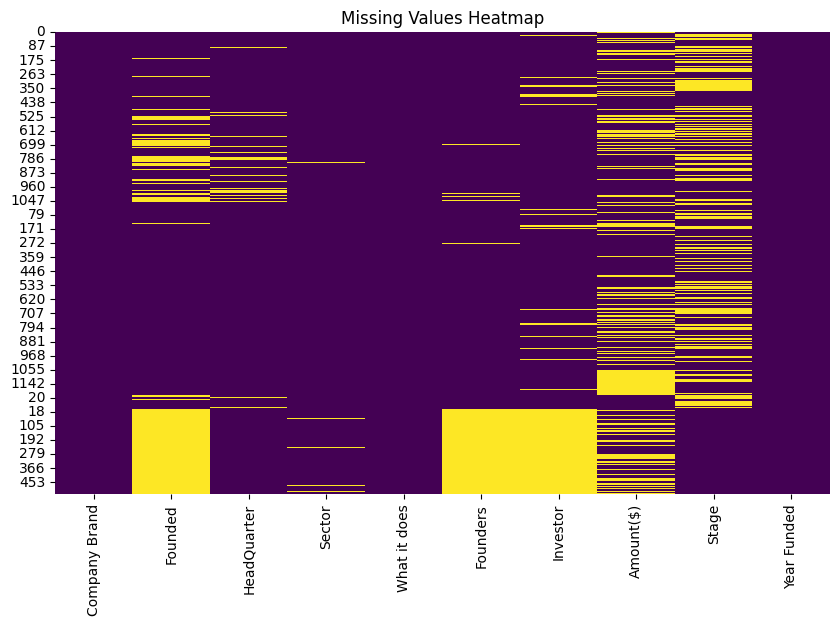

In [649]:



# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data_final.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Handle missing values (e.g., drop columns, impute values)
# df.dropna(inplace=True)  # Drop rows with missing values
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)  # Impute missing values


Handling missing values

In [650]:


print("Skewness for the 'Amount($)' column:", amount_skewness)


Skewness for the 'Amount($)' column: 4.327377757827879


A skewness value of 4.3274 indicates that the distribution is highly positively skewed. Positive skewness means that the right tail of the distribution is longer or fatter than the left tail, and the majority of the data points are concentrated on the left side. This practically means that  there are extreme values or outliers on the right side of the distribution, pulling the mean and the tail in that direction. Filling null values with the median is the best option in this case.

In [669]:

amount_median = data_final['Amount($)'].median()
data_final['Amount($)'].fillna(amount_median, inplace=True)


Mode imputation is a simple method that doesn't introduce much complexity to the data and imputing missing values with the mode won't significantly impact the analysis. It will also ensure that the imputed values align with the overall distribution of the sector column.

In [652]:
# Calculate the mode of the 'Sector' column
mode_sector = data_final['Sector'].mode()[0]

# Fill missing values with the mode
data_final['Sector'].fillna(mode_sector, inplace=True)


In [653]:
# dealing with missing values in 'HeadQuarter' column

data_final['HeadQuarter'].fillna("Not Specified", inplace=True)

In [654]:
# Calculate the mode of the 'Stage' column
mode_stage = data_final['Stage'].mode()[0]

# Fill missing values with the mode
data_final['Stage'].fillna(mode_stage, inplace=True)

In [670]:
# check for number of missing values

data_final.isnull().sum()

Company Brand    0
HeadQuarter      0
Sector           0
What it does     0
Amount($)        0
Stage            0
Year Funded      0
dtype: int64

Founded, Investor and Founders columns are dropped because they are not relevant for the analysis

In [656]:
#drop Founded column
data_final = data_final.drop(columns='Founded')

In [657]:
#drop Founders column

data_final = data_final.drop(columns='Founders')

In [658]:
#drop Investor column

data_final = data_final.drop(columns='Investor')

In [659]:
#get data shape
data_final.shape

(2857, 7)

In [660]:
data_final['Stage'].describe()

count     2857
unique      63
top       seed
freq      1534
Name: Stage, dtype: object

# Answering Business Questions
1. What top 10 sectors have received the highest amount of funding

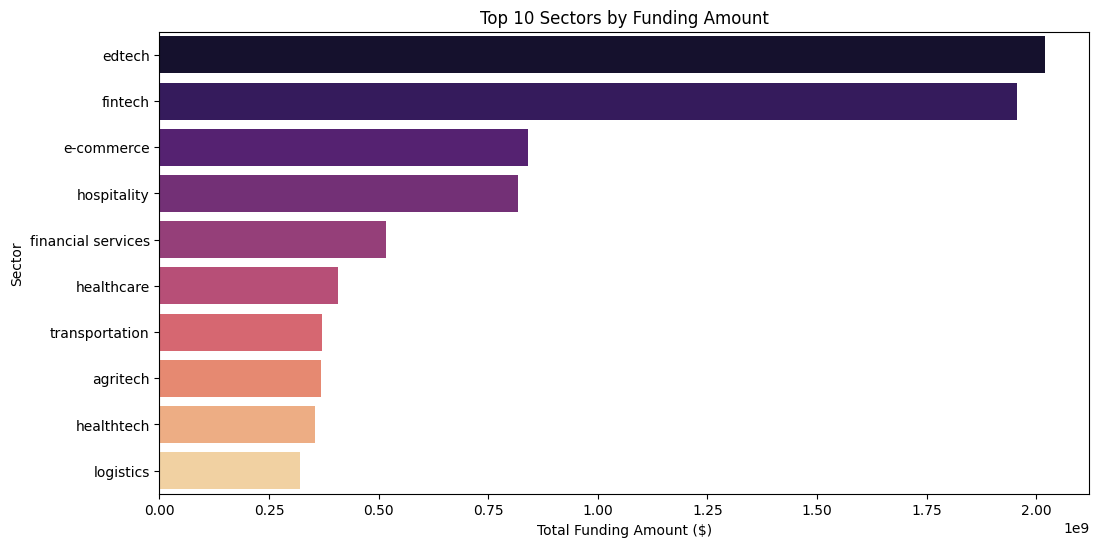

In [661]:
#plot a bar chart showing the top 10 sectors with highest amount of funding

top_sectors = data_final.groupby('Sector')['Amount($)'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_sectors.values, y=top_sectors.index, palette='magma')
plt.title('Top 10 Sectors by Funding Amount')
plt.xlabel('Total Funding Amount ($)')
plt.ylabel('Sector')
plt.show()

This plot highlights the Top 10 sectors which received the most amounts of funding. We can confidently say that these sectors had the most attractive opportunities for both investors and founders with EdTech being on top of the list



2.  Which sectors have received lowest amounts of funding

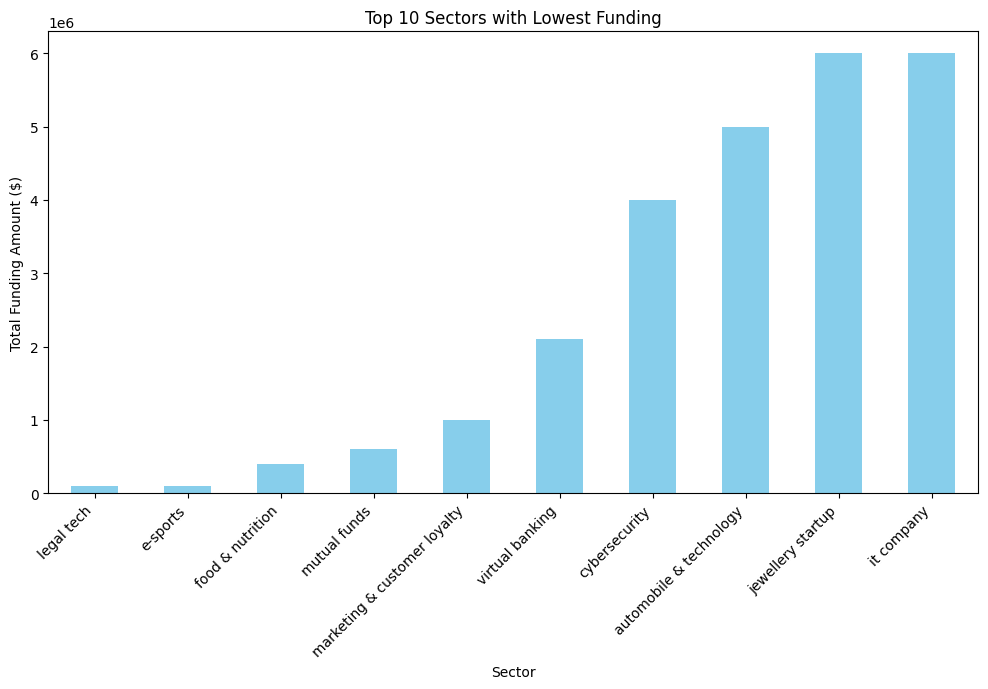

In [662]:
# Group by sector and calculate the total funding for each sector
sector_funding = data_final.groupby('Sector')['Amount($)'].sum()

# Sort sectors by total funding in ascending order and select the top 10
top_10_lowest_sectors = sector_funding.sort_values().head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_10_lowest_sectors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Sectors with Lowest Funding')
plt.xlabel('Sector')
plt.ylabel('Total Funding Amount ($)')
plt.xticks(rotation=45, ha='right')
plt.show()



From the above plot, it is evident that these sectors received the lowest amount of funding and are therefore not advisable opportunities for both investors and startup founders.





3. What is the average amount of funding a startup can receive in the Indian ecosystem




In [663]:
# Calculate the average funding amount
average_funding = data_final['Amount($)'].mean()
average_funding

7006101.925096255

The output above shows that the average amount of funding received by Indian startups is about $7 million.This amount is considerably high and shows that investors generally have a high confidence in startups and the overall business environment in India.

4. Which funding stages tend to receive the highest amount of funding

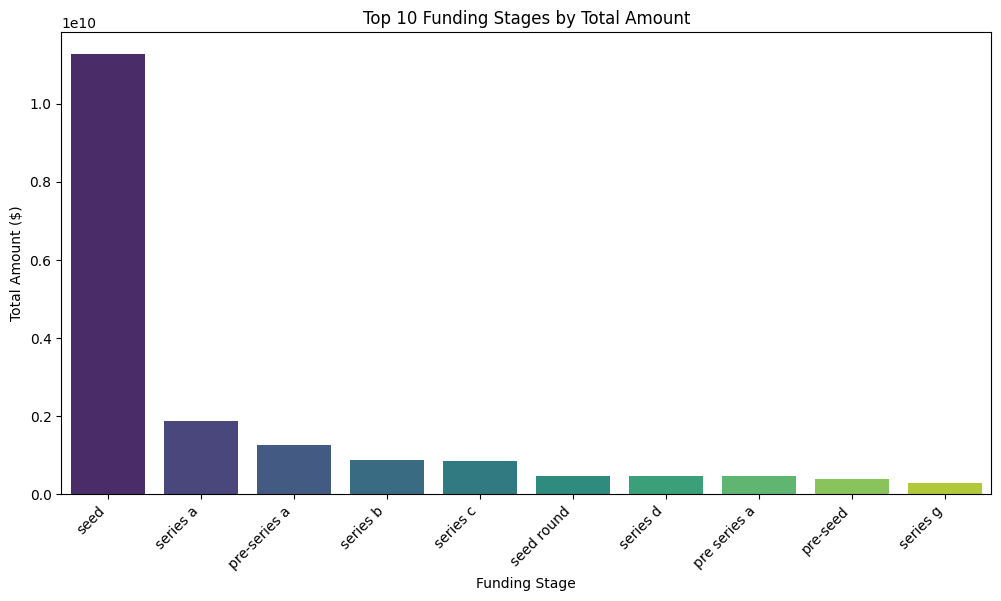

In [664]:
# Group by Stage and calculate the sum of Amount
total_amount_by_stage = data_final.groupby('Stage')['Amount($)'].sum().sort_values(ascending=False)

# Select top 10 funding stages
top_10_stages = total_amount_by_stage.head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stages.index, y=top_10_stages.values, palette='viridis')
plt.title('Top 10 Funding Stages by Total Amount')
plt.xlabel('Funding Stage')
plt.ylabel('Total Amount ($)')
plt.xticks(rotation=45, ha='right')  

# Show the plot
plt.show()

It is obvious from the above plot that the 'Seed' stage received the most amount of funding. Understanding which stages attract more funding can provide insights into the competitive landscape and aid our decision as startups

5. Which location of HeadQuarters in India have the highest concentration of highly funded startups

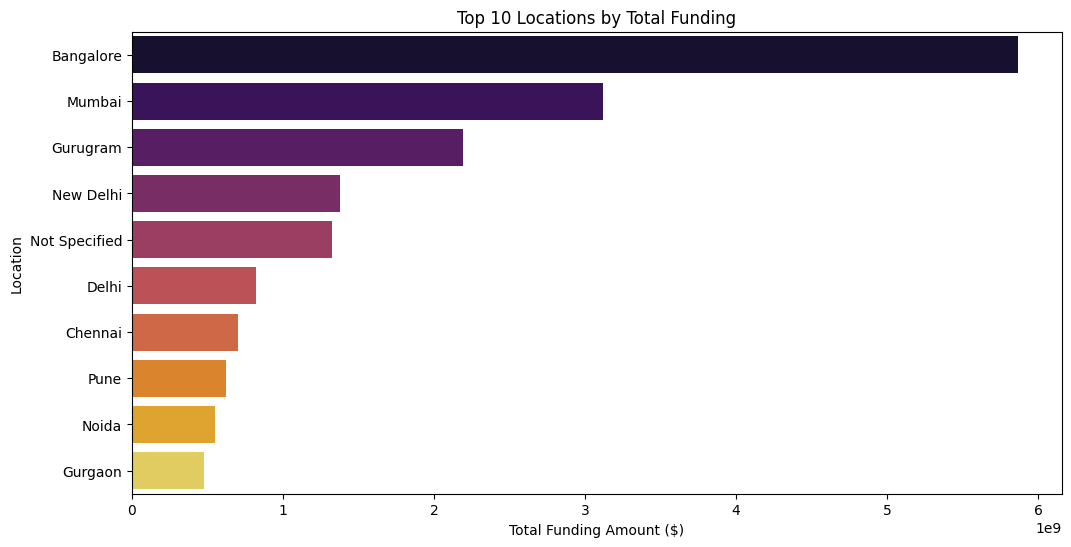

In [665]:
# Group data by 'HeadQuarter' and calculate the total funding for each location
location_total_funding = data_final.groupby('HeadQuarter')['Amount($)'].sum().sort_values(ascending=False)

# Select the top N locations, for example, the top 10
top_locations = location_total_funding.head(10)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='inferno')  

# Customize the plot
plt.title('Top 10 Locations by Total Funding')
plt.xlabel('Total Funding Amount ($)')
plt.ylabel('Location')

# Show the plot
plt.show()

High funding amounts in specific locations may indicate vibrant startup ecosystems or the presence of key industry players.From the above plot, it can be seen that Bangalore has the highest concentration of successful startups with regards to funding amounts.

6. What is the overall trend in funding for Indian startups between 2018 and 2021

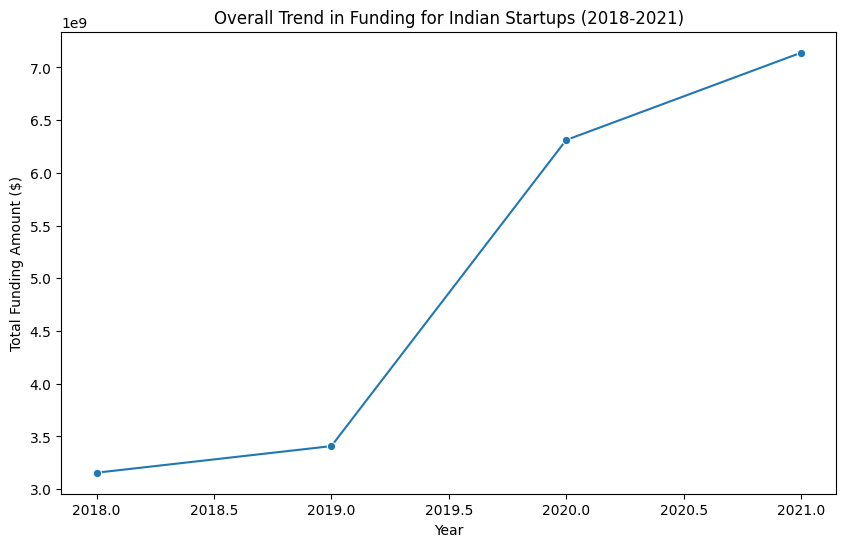

In [666]:

total_funding_per_year = data_final.groupby('Year Funded')['Amount($)'].sum().reset_index()

# Plotting the trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year Funded', y='Amount($)', data=total_funding_per_year, marker='o')
plt.title('Overall Trend in Funding for Indian Startups (2018-2021)')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount ($)')
plt.show()


From the line plot above, it can be seen that the amounts of funding received by Indian Startups increased considerably as the years went by (2018-2021). 